Upload the ZIP file containing the AQI dataset...


Saving archive.zip to archive (2).zip
MSE: 432.12
R²: 0.95


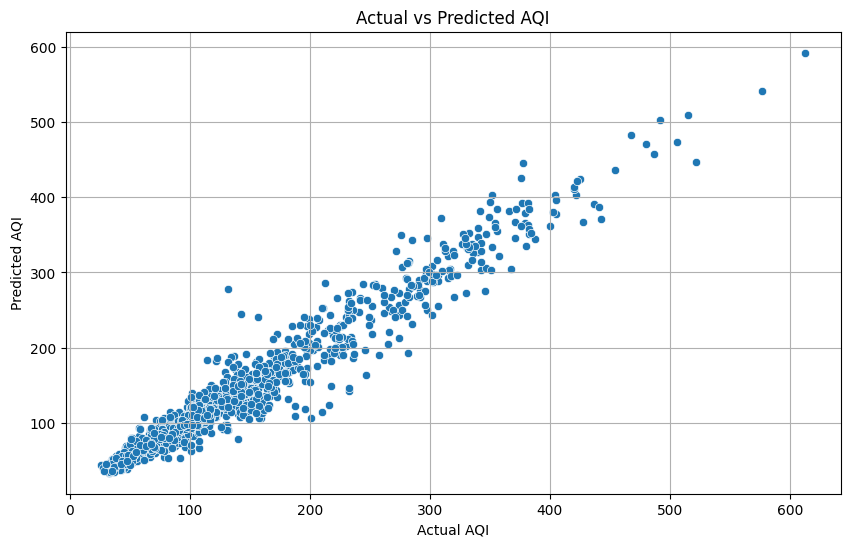

In [7]:
from google.colab import files
import zipfile
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Upload the ZIP file
print("Upload the ZIP file containing the AQI dataset...")
uploaded = files.upload()

# Step 2: Extract ZIP contents
for file_name in uploaded.keys():
    with zipfile.ZipFile(io.BytesIO(uploaded[file_name]), 'r') as zip_ref:
        zip_ref.extractall("extracted_data")

# Step 3: Load a specific CSV from extracted files
df = pd.read_csv("extracted_data/city_day.csv")  # Change if you're using another file

# Step 4: Drop missing values
df = df.dropna()

# Step 5: Define features and target
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
target = 'AQI'

# Filter for available columns
df = df[[col for col in features + [target] if col in df.columns]]

# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')

# Plot results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.grid(True)
plt.show()